In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Load data from google drive -------------------------------------------------
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# link = 'https://drive.google.com/file/d/1-cUe1Kx5kqawmbKxkqXfGVHT6LB3UvaI/view?usp=drive_link'

# import pandas as pd

# # to get the id part of the file
# id = link.split("/")[-2]

# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('equity_chars_ret.csv')

df = pd.read_csv('equity_chars_ret.csv', index_col = 0)

<ipython-input-1-58d7f12163da>:26: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('equity_chars_ret.csv', index_col = 0)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('equity_chars_ret.csv', index_col = 0)

<ipython-input-2-f40e3044293c>:6: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('equity_chars_ret.csv', index_col = 0)


In [3]:
df.head()

,permno,DATE,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,RET
0,10001,20000131,20825.0000,0.062780,0.003941,0.093899,8.271964,0.025807,0.078753,-0.004188,...,NaN,0.012581,4.016382e-06,0.050882,0.022777,1.078260,0.597444,3.818182e+00,49.0,-0.044118
1,10002,20000131,94197.1875,0.487762,0.237912,0.026658,8.875427,0.050570,-0.036174,-0.123036,...,6.0,0.035375,3.703263e-06,0.070352,0.028031,1.163444,0.172986,7.636364e+00,60.0,-0.025641
2,10009,20000131,34028.2500,0.299177,0.089507,-0.093446,10.366105,0.035277,-0.036174,-0.202703,...,3.0,0.031896,2.535039e-07,0.017241,0.015675,1.046077,4.829668,2.881086e-08,60.0,-0.008475
3,10012,20000131,154794.3125,2.389731,5.710816,2.007230,13.700713,0.145356,0.914538,0.107759,...,3.0,0.112558,1.265005e-08,0.236364,0.078982,0.712583,23.904388,3.353590e-09,36.0,-0.097276
4,10016,20000131,337277.3750,0.619844,0.384206,-0.183942,11.928143,0.039299,0.325924,-0.084848,...,2.0,0.043094,8.944278e-08,0.056604,0.028425,1.005188,2.595967,3.859758e-08,38.0,-0.099338


In [4]:
df['RET']

0         -0.044118
1         -0.025641
2         -0.008475
3         -0.097276
4         -0.099338
             ...   
1665724    0.164342
1665725     0.08127
1665726    0.071545
1665727   -0.065069
1665728   -0.076855
Name: RET, Length: 1665729, dtype: object

In [5]:
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

In [6]:
df.columns

Index(['permno', 'DATE', 'mvel1', 'beta', 'betasq', 'chmom', 'dolvol',
       'idiovol', 'indmom', 'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay',
       'turn', 'absacc', 'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt',
       'cashpr', 'cfp', 'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv',
       'chpmia', 'convind', 'currat', 'depr', 'divi', 'divo', 'dy', 'egr',
       'ep', 'gma', 'grcapx', 'grltnoa', 'herf', 'hire', 'invest', 'lev',
       'lgr', 'mve_ia', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat',
       'pchdepr', 'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt',
       'pchsale_pchrect', 'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'ps',
       'quick', 'rd', 'rd_mve', 'rd_sale', 'realestate', 'roic', 'salecash',
       'saleinv', 'salerec', 'secured', 'securedind', 'sgr', 'sin', 'sp',
       'tang', 'tb', 'aeavol', 'cash', 'chtx', 'cinvest', 'ear', 'nincr',
       'roaq', 'roavol', 'roeq', 'rsup', 'stdacc', 'stdcf', 'ms', 'baspread',
       'ill', 'maxret', 'retvol', '

Get 94 Features Name

In [7]:
characteristics = list(set(df.columns).difference({'permno','DATE', 'sic2', 'RET'}))

- Pick out Top 1000 and Bottom 1000 Firms
Next, let's pick out the top 1000 and bottom 1000 firms with respect to market capitalization to see the differnce of predictability between big firms and small firms.

In [8]:
df_top = df.sort_values('mvel1',ascending=False).groupby('DATE').head(1000).reset_index(drop=True)
df_bot = df.sort_values('mvel1',ascending=False).groupby('DATE').tail(1000).reset_index(drop=True)

### Missing Characteristics
- Delete the __missing ret__
- Check duplicate rows

In [9]:
# missing data before filling
df.isnull().sum()

permno             0
DATE               0
mvel1            280
beta          121307
betasq        121307
               ...  
std_dolvol      1482
std_turn         557
zerotrade        422
sic2           46522
RET             8995
Length: 98, dtype: int64

In [10]:
df = df.dropna(subset = 'RET')

In [11]:
df.isnull().sum()

permno             0
DATE               0
mvel1            269
beta          121027
betasq        121027
               ...  
std_dolvol      1462
std_turn         553
zerotrade        412
sic2           45564
RET                0
Length: 98, dtype: int64

In [12]:
# Select duplicates based on 'permno' and 'DATE'
duplicate_mask = df.duplicated(subset=['permno', 'DATE'], keep=False)
duplicates = df[duplicate_mask]

In [13]:
# Display the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [permno, DATE, mvel1, beta, betasq, chmom, dolvol, idiovol, indmom, mom1m, mom6m, mom12m, mom36m, pricedelay, turn, absacc, acc, age, agr, bm, bm_ia, cashdebt, cashpr, cfp, cfp_ia, chatoia, chcsho, chempia, chinv, chpmia, convind, currat, depr, divi, divo, dy, egr, ep, gma, grcapx, grltnoa, herf, hire, invest, lev, lgr, mve_ia, operprof, orgcap, pchcapx_ia, pchcurrat, pchdepr, pchgm_pchsale, pchquick, pchsale_pchinvt, pchsale_pchrect, pchsale_pchxsga, pchsaleinv, pctacc, ps, quick, rd, rd_mve, rd_sale, realestate, roic, salecash, saleinv, salerec, secured, securedind, sgr, sin, sp, tang, tb, aeavol, cash, chtx, cinvest, ear, nincr, roaq, roavol, roeq, rsup, stdacc, stdcf, ms, baspread, ill, maxret, retvol, std_dolvol, std_turn, zerotrade, sic2, RET]
Index: []

[0 rows x 98 columns]


In [14]:
import plotly.express as px

In [15]:
# Calculate missing percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a plot for missing percentage with color scale
fig = px.bar(missing_percentage, x=missing_percentage.index, y=missing_percentage.values,
             labels={'index': 'Features', 'y': 'Missing Percentage'},
             title='Feature Missing Percentage',
             template='plotly_dark',
             color=missing_percentage.values,  # Use the values for color scale
             color_continuous_scale='Viridis',  # Specify the color scale
             )

# Show the plot
fig.show()


In [16]:
missing_percentage

permno        0.000000
DATE          0.000000
mvel1         0.016237
beta          7.305156
betasq        7.305156
                ...   
std_dolvol    0.088246
std_turn      0.033379
zerotrade     0.024868
sic2          2.750230
RET           0.000000
Length: 98, dtype: float64

- Calculate Features Correlation Matrix and Plot Heatmap

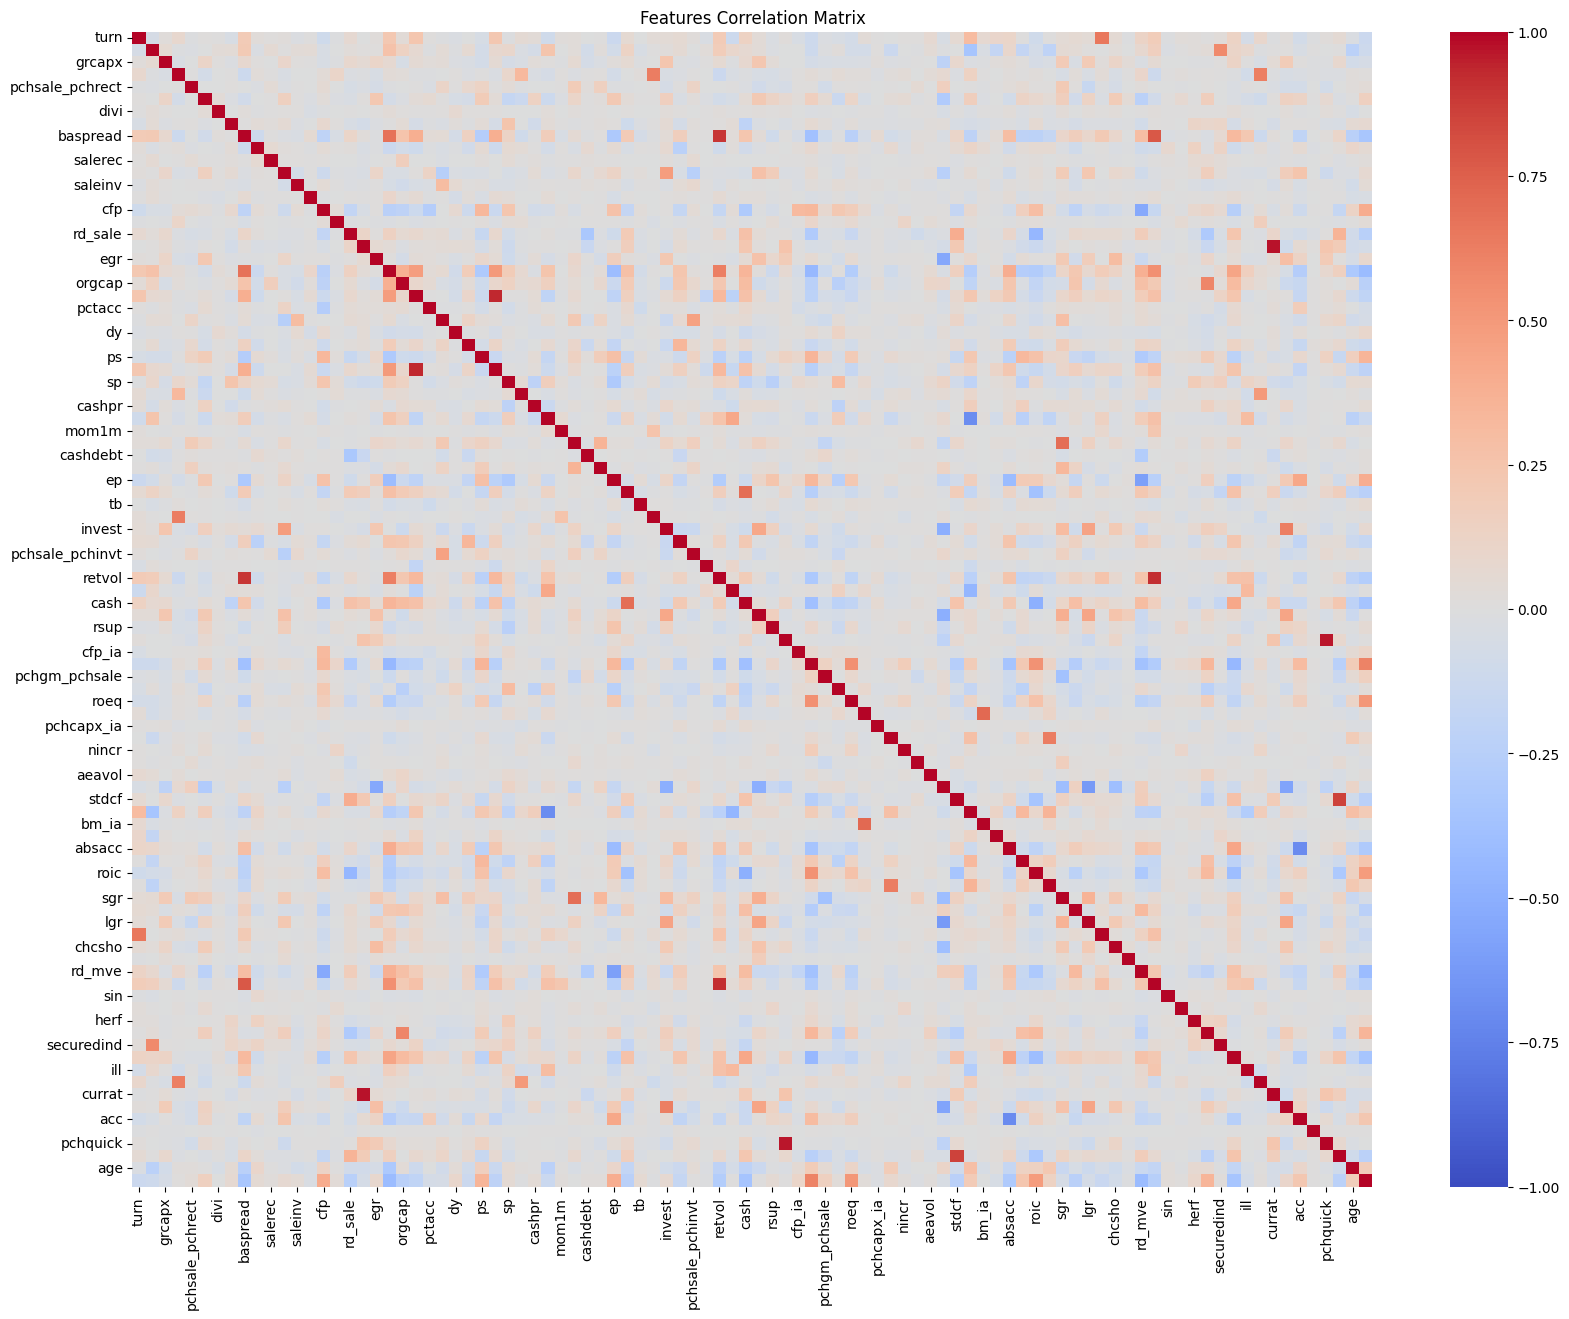

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df[characteristics].corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", vmin=-1, vmax=1)
plt.title('Features Correlation Matrix')
plt.show()

In [18]:
# Flatten the correlation matrix
flat_corr = correlation_matrix.unstack()

# Remove self-correlations and duplicates
flat_corr = flat_corr[flat_corr != 1].sort_values(ascending=False)

# Filter correlations with absolute value greater than 0.7
high_corr = flat_corr[(flat_corr.abs() > 0.7) & (flat_corr.abs() < 1)]

# Print the sorted correlations and corresponding feature names
for idx, (features, corr) in enumerate(high_corr.items()):
    feature1, feature2 = features
    print(f"{idx + 1}. Correlation: {corr:.4f} - Features: {feature1} and {feature2}")


1. Correlation: 0.9693 - Features: quick and currat
2. Correlation: 0.9693 - Features: currat and quick
3. Correlation: 0.9679 - Features: pchquick and pchcurrat
4. Correlation: 0.9679 - Features: pchcurrat and pchquick
5. Correlation: 0.9304 - Features: beta and betasq
6. Correlation: 0.9304 - Features: betasq and beta
7. Correlation: 0.9169 - Features: retvol and maxret
8. Correlation: 0.9169 - Features: maxret and retvol
9. Correlation: 0.8982 - Features: baspread and retvol
10. Correlation: 0.8982 - Features: retvol and baspread
11. Correlation: 0.8523 - Features: stdcf and stdacc
12. Correlation: 0.8523 - Features: stdacc and stdcf
13. Correlation: 0.7797 - Features: baspread and maxret
14. Correlation: 0.7797 - Features: maxret and baspread
15. Correlation: 0.7113 - Features: bm and bm_ia
16. Correlation: 0.7113 - Features: bm_ia and bm


In [19]:
np.unique(df['sic2'])

array([ 1.,  2.,  7.,  8.,  9., 10., 12., 13., 14., 15., 16., 17., 20.,
       21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
       34., 35., 36., 37., 38., 39., 40., 41., 42., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.,
       61., 62., 63., 64., 65., 67., 70., 72., 73., 75., 76., 78., 79.,
       80., 81., 82., 83., 86., 87., 89., 99., nan])

In [20]:
len(np.unique(df['permno']))

17926

In [21]:
# import pandas as pd
# import plotly.express as px
from scipy.stats import pearsonr, mstats

# Convert 'RET' to numeric, coerce non-numeric values to NaN
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

# Create empty lists to store feature names, correlations, and p-values
features = []
correlations = []
p_values = []

# Loop through each feature and calculate correlation with 'RET'
for feature in characteristics:
    if feature != 'RET':  # Skip the 'RET' column
        # Calculate correlation and p-value
        df_tmp = df[[feature] + ['RET']].dropna()
        correlation, p_value = pearsonr(df_tmp[feature], df_tmp['RET'])

        # Append results to lists
        features.append(feature)
        correlations.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with the results
correlation_df_all = pd.DataFrame({'Feature': features, 'Correlation': correlations, 'P-Value': p_values})
correlation_df_all['Correlation'] *= 100

# Sort DataFrame by absolute correlation in descending order
correlation_df_all = correlation_df_all.reindex(correlation_df_all['Correlation'].abs().sort_values(ascending=False).index)

# Significance color mapping
significance_color = np.where(correlation_df_all['P-Value'] < 0.05, 'rgba(0, 100, 0, 0.8)', 'rgba(139, 0, 0, 0.8)')

# Plot using plotly
fig = px.bar(correlation_df_all, x='Feature', y='Correlation', color=significance_color,
             labels={'Correlation': 'Correlation with RET (%)', 'P-Value': 'P-Value'},
             title='Correlation of Features with Return and Significance',
             template='plotly_dark')

# Show the plot
fig.show()


- Feature Selection:
  Select the features where p-value > 0.05 and missing percentage < 30%

In [22]:
# Specify the threshold for P-Value and missing percentage
p_value_threshold = 0.05
missing_percentage_threshold = 30

# Select rows based on the conditions
if 'Feature' in correlation_df_all.columns:
  correlation_df_all.set_index('Feature', inplace=True)
correlation_df_all['missing_per'] = missing_percentage

selected_characteristics = correlation_df_all[(correlation_df_all['P-Value'] > p_value_threshold) & (correlation_df_all['missing_per'] > missing_percentage_threshold)].index
selected_characteristics1 = correlation_df_all[(correlation_df_all['P-Value'] > p_value_threshold)].index
selected_characteristics2 = correlation_df_all[(correlation_df_all['missing_per'] > missing_percentage_threshold)].index


In [23]:
correlation_df_all

,Correlation,P-Value,missing_per
Feature,,,
rd_mve,2.788615,1.198505e-117,58.744795
agr,2.748353,1.126429e-210,23.352753
sp,2.518889,9.445701e-186,19.649986
mom36m,-2.085372,5.879021e-131,17.725718
dolvol,-2.027668,6.046893e-149,0.835741
...,...,...,...
ms,0.046430,6.026501e-01,24.115398
chtx,0.035561,6.908779e-01,24.521438
secured,-0.015606,8.860286e-01,49.083377


In [24]:
print(selected_characteristics)
print(selected_characteristics1)
print(selected_characteristics2)

Index(['pchsaleinv', 'saleinv', 'secured'], dtype='object', name='Feature')
Index(['pchsaleinv', 'securedind', 'herf', 'mvel1', 'operprof', 'mom6m',
       'zerotrade', 'divo', 'dy', 'std_turn', 'bm_ia', 'saleinv', 'pricedelay',
       'chempia', 'pchcapx_ia', 'cashdebt', 'ms', 'chtx', 'secured', 'tang',
       'depr'],
      dtype='object', name='Feature')
Index(['rd_mve', 'grltnoa', 'realestate', 'grcapx', 'orgcap',
       'pchsale_pchxsga', 'stdcf', 'stdacc', 'rd_sale', 'roavol',
       'pchsale_pchinvt', 'pchsaleinv', 'saleinv', 'secured'],
      dtype='object', name='Feature')


In [25]:
from scipy.stats import pearsonr
for sic, df_sic in df.groupby('sic2'):

    # Create empty lists to store feature names, correlations, and p-values
    features = []
    correlations = []
    p_values = []

    # Loop through each feature and calculate correlation with 'RET'
    for feature in characteristics:
        if feature != 'RET':  # Skip the 'RET' column
            # Calculate correlation and p-value
            df_tmp = df_sic[[feature] + ['RET']].dropna()

            # Check if the feature has no variation
            if np.isclose(np.min(df_tmp[feature]), np.max(df_tmp[feature])):
                # print(f"Warning: {feature} has no variation in SIC {sic}. Skipping.")
                break

            if len(df_tmp) > 5000:
              correlation, p_value = pearsonr(df_tmp[feature], df_tmp['RET'])

              # Append results to lists
              features.append(feature)
              correlations.append(correlation)
              p_values.append(p_value)

    if len(features) > 90:
        # Create a DataFrame with the results
        correlation_df = pd.DataFrame({'Feature': features, 'Correlation': correlations, 'P-Value': p_values})
        correlation_df['Correlation'] *= 100

        # # Sort DataFrame by absolute correlation in descending order
        # correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

        # # Significance color mapping
        # significance_color = np.where(correlation_df['P-Value'] < 0.05, 'rgba(0, 100, 0, 0.8)', 'rgba(139, 0, 0, 0.8)')

        # Plot using plotly
        fig = px.bar(correlation_df, x='Feature', y='Correlation', color='P-Value',
                    labels={'Correlation': 'Correlation with RET (%)', 'P-Value': 'P-Value'},
                    title=f'sic2 = {sic}: Correlation of Features with Return and Significance',
                    template='plotly_dark')

        # Show the plot
        fig.show()


- According to the paper, the __missing data__ are replaced by the _cross-sectional median_.


In [3]:
# fill na with cross-sectional median
for feature in characteristics:
     df[feature] = df.groupby('DATE')[feature].transform(lambda x: x.fillna(x.median()))

NameError: ignored

In [4]:
df.isnull().sum()

NameError: ignored

In [2]:
# Calculate missing percentage
missing_percentage2 = (df[characteristics].isnull().sum() / len(df)) * 100

# Create a plot for missing percentage with color scale
fig = px.bar(missing_percentage2, x=missing_percentage2.index, y=missing_percentage2.values,
             labels={'index': 'Features', 'y': 'Missing Percentage'},
             title='Feature Missing Percentage After Fill by Cross-Sectional Median',
             template='plotly_dark',
             color=missing_percentage2.values,  # Use the values for color scale
             color_continuous_scale='Viridis',  # Specify the color scale
             )

# Show the plot
fig.show()

NameError: ignored

- Do the same process to top and bottom 1000 firms data.

In [1]:
def fill_median(data, characteristics):
    for ch in characteristics:
         data[ch] = data.groupby('DATE')[ch].transform(lambda x: x.fillna(x.median()))
    return data

df_top = fill_median(df_top, characteristics)
df_bot = fill_median(df_bot, characteristics)

NameError: ignored

### Transform SIC Code into Dummies

In [30]:
len(np.unique(df['sic2']))

74

In [31]:
# get dummies for SIC code
def get_sic_dummies(data):
    sic_dummies = pd.get_dummies(data['sic2'].fillna(999).astype(int),prefix='sic').drop('sic_999',axis=1)
    data = pd.concat([data, sic_dummies],axis=1)
    data.drop(['sic2'],inplace=True,axis=1)
    return data

In [32]:
df = get_sic_dummies(df)
df_top = get_sic_dummies(df_top)
df_bot = get_sic_dummies(df_bot)

In [33]:
df

,permno,DATE,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,sic_78,sic_79,sic_80,sic_81,sic_82,sic_83,sic_86,sic_87,sic_89,sic_99
0,10001,20000131,2.082500e+04,0.062780,0.003941,0.093899,8.271964,0.025807,0.078753,-0.004188,...,0,0,0,0,0,0,0,0,0,0
1,10002,20000131,9.419719e+04,0.487762,0.237912,0.026658,8.875427,0.050570,-0.036174,-0.123036,...,0,0,0,0,0,0,0,0,0,0
2,10009,20000131,3.402825e+04,0.299177,0.089507,-0.093446,10.366105,0.035277,-0.036174,-0.202703,...,0,0,0,0,0,0,0,0,0,0
3,10012,20000131,1.547943e+05,2.389731,5.710816,2.007230,13.700713,0.145356,0.914538,0.107759,...,0,0,0,0,0,0,0,0,0,0
4,10016,20000131,3.372774e+05,0.619844,0.384206,-0.183942,11.928143,0.039299,0.325924,-0.084848,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665724,93423,20211231,3.144398e+06,1.923076,3.698221,-0.673385,16.305232,0.062619,0.491455,-0.110868,...,0,1,0,0,0,0,0,0,0,0
1665725,93426,20211231,4.326610e+05,1.224523,1.499457,-0.061462,12.419552,0.033723,0.346308,0.007040,...,0,0,0,0,0,0,0,0,0,0
1665726,93427,20211231,4.092710e+06,0.887083,0.786917,-0.080295,14.884834,0.045395,0.346308,0.151667,...,0,0,0,0,0,0,0,0,0,0
1665727,93434,20211231,1.130478e+05,0.512942,0.263110,-0.543760,12.243872,0.088124,0.270005,-0.319347,...,0,0,0,0,0,0,0,0,0,0


### Macroeconomic Predictors Data

The eight macroeconomic predictors follows the definitions by Welch and Goyal (2008, RFS). The data are available on Prof Goyal's [website](https://sites.google.com/view/agoyal145).

In [34]:
link2 = 'https://drive.google.com/file/d/13aJkTifP5a2VzIjx1ju5bmMBOIfmAVVi/view?usp=drive_link'

# to get the id part of the file
id2 = link2.split("/")[-2]

downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('PredictorData2022.csv')

# load macroeconomic predictors data
df_ma = pd.read_csv('PredictorData2022.csv')

In [35]:
df_ma = pd.read_csv('PredictorData2022.csv')

In [36]:
df_ma

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,202208,"3,955.00",64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
1820,202209,"3,585.62",65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
1821,202210,"3,871.98",65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196
1822,202211,"4,080.11",66.3880,177.5267,0.207182,0.0415,0.0490,0.0607,0.0389,-0.017011,0.002900,-0.001010,0.0268,0.0518,0.006343,NaN,0.054166,0.052158


In [37]:
df_ma['yyyymm']

0       187101
1       187102
2       187103
3       187104
4       187105
         ...  
1819    202208
1820    202209
1821    202210
1822    202211
1823    202212
Name: yyyymm, Length: 1824, dtype: int64

In [38]:
df_ma = df_ma[(df_ma['yyyymm']>=200001)&(df_ma['yyyymm']<=202112)].reset_index(drop=True)

# construct predictor
ma_predictors = ['dp_sp','ep_sp','bm_sp','ntis','tbl','tms','dfy','svar']
df_ma['Index'] = df_ma['Index'].str.replace(',','').astype('float64')
df_ma['dp_sp'] = df_ma['D12']/df_ma['Index']
df_ma['ep_sp'] = df_ma['E12']/df_ma['Index']
df_ma.rename({'b/m':'bm_sp'},axis=1,inplace=True)
df_ma['tms'] = df_ma['lty']-df_ma['tbl']
df_ma['dfy'] = df_ma['BAA']-df_ma['AAA']
df_ma = df_ma[['yyyymm']+ma_predictors]
# df_ma['yyyymm'] = pd.to_datetime(df_ma['yyyymm'],format='%Y%m')+pd.offsets.MonthEnd(0)
# # Convert datetime to integer in the format 'yyyymm'
# df_ma['yyyymm'] = df_ma['yyyymm'].dt.strftime('%Y%m%d').astype(int)

df_ma.head()

,yyyymm,dp_sp,ep_sp,bm_sp,ntis,tbl,tms,dfy,svar
0,200001,0.011987,0.035208,0.154654,0.025359,0.0532,0.0134,0.0055,0.005206
1,200002,0.012250,0.036609,0.167056,0.027419,0.0555,0.0091,0.0061,0.003000
2,200003,0.011185,0.033999,0.149974,0.018291,0.0569,0.0049,0.0069,0.006678
3,200004,0.011527,0.035302,0.152600,0.011945,0.0566,0.0064,0.0076,0.007942
4,200005,0.011772,0.036320,0.155669,0.009179,0.0579,0.0061,0.0091,0.005185


### Get All Features, Split, and Transform
- Construct interaction terms
- Split the dataset
- Transform the data into (-1, 1)


In [39]:
from sklearn.preprocessing import MinMaxScaler

def interactions(data, data_ma, characteristics, ma_predictors):
    # construct interactions between firm characteristics and macroeconomic predictors
    # Convert 'Date' to datetime
    data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

    # Extract year and month and convert them to 'yyyymm'
    data['DATE'] = data['DATE'].dt.to_period('M').dt.strftime('%Y%m').astype(int)

    # Merge the dataset
    data_ma_long = pd.merge(data[['DATE']], data_ma,left_on='DATE', right_on='yyyymm', how='left').reset_index(drop=True)
    # data = data.reset_index(drop=True)
    # data_ma_long = data_ma_long.reset_index(drop=True)

    # Generate interaction features
    interactions_df = pd.DataFrame()  # Initialize an empty DataFrame for interactions
    for fc in characteristics:
        for mp in ma_predictors:
            interactions_df[f'{fc}*{mp}'] = data[fc] * data_ma_long[mp]

    # Concatenate the original DataFrame and the interactions DataFrame
    data = pd.concat([data, interactions_df], axis=1)

    features = list(set(data.columns).difference({'permno','DATE','RET'})) # a list storing all 920 features used
    print(f"# of feature is {len(features)}")
    return data, features

def split_by_fix_date(data, train_start_date, val_start_date, test_start_date, test_end_date):
    train_dataset = data[(data['DATE'] >= train_start_date) & (data['DATE'] < val_start_date)]
    val_dataset = data[(data['DATE'] >= val_start_date) & (data['DATE'] < test_start_date)]
    test_dataset = data[(data['DATE'] >= test_start_date) & (data['DATE'] <= test_end_date)]
    return train_dataset, val_dataset, test_dataset


def transform(data, features, minmax=True):
    if minmax:
        scaler = MinMaxScaler((-1, 1))
        data[features] = scaler.fit_transform(data[features])
    else:
        pass
    print(f"The shape of the data is: {data.shape}")
    return data

In [ ]:
df, features = interactions(df, df_ma, characteristics, ma_predictors)
df_top, features = interactions(df_top, df_ma, characteristics, ma_predictors)
df_bot, features = interactions(df_bot, df_ma, characteristics, ma_predictors)

<ipython-input-39-cce541912336>:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-39-cce541912336>:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-39-cce541912336>:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-39-cce541912336>:20: PerformanceWarning:

In [ ]:
train_start_date = 200001
val_start_date = 201501
test_start_date = 201801
test_end_date = 202112

train_dataset, val_dataset, test_dataset = split_by_fix_date(df, train_start_date, val_start_date, test_start_date, test_end_date)
train_dataset_top, val_dataset_top, test_dataset_top = split_by_fix_date(df_top, train_start_date, val_start_date, test_start_date, test_end_date)
train_dataset_bot, val_dataset_bot, test_dataset_bot = split_by_fix_date(df_bot, train_start_date, val_start_date, test_start_date, test_end_date)

train_dataset = transform(train_dataset, features, minmax=True)
val_dataset = transform(val_dataset, features, minmax=True)
test_dataset = transform(test_dataset, features, minmax=True)

train_dataset_top = transform(train_dataset_top, features, minmax=True)
val_dataset_top = transform(val_dataset_top, features, minmax=True)
test_dataset_top = transform(test_dataset_top, features, minmax=True)

train_dataset_bot = transform(train_dataset_bot, features, minmax=True)
val_dataset_bot = transform(val_dataset_bot, features, minmax=True)
test_dataset_bot = transform(test_dataset_bot, features, minmax=True)

In [ ]:
test_dataset

In [ ]:
features

In [ ]:
train_dataset

In [ ]:
train_dataset['DATE'] = train_dataset['DATE'].astype('int')

In [ ]:
train_dataset

In [ ]:
val_dataset['DATE'] = val_dataset['DATE'].astype('int')
test_dataset['DATE'] = test_dataset['DATE'].astype('int')

train_dataset_top['DATE'] = train_dataset_top['DATE'].astype('int')
val_dataset_top['DATE'] = val_dataset_top['DATE'].astype('int')
test_dataset_top['DATE'] = test_dataset_top['DATE'].astype('int')

train_dataset_bot['DATE'] = train_dataset_bot['DATE'].astype('int')
val_dataset_bot['DATE'] = val_dataset_bot['DATE'].astype('int')
test_dataset_bot['DATE'] = test_dataset_bot['DATE'].astype('int')

In [ ]:
train_dataset.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/train_dataset.csv")

In [ ]:
val_dataset.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/val_dataset.csv")

In [ ]:
test_dataset.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/test_dataset.csv")

In [ ]:
pd.DataFrame(features).to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/features.csv")

In [ ]:
train_dataset_top.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/train_dataset_top.csv")
val_dataset_top.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/val_dataset_top.csv")
test_dataset_top.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/test_dataset_top.csv")

In [ ]:
train_dataset_bot.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/train_dataset_bot.csv")
val_dataset_bot.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/val_dataset_bot.csv")
test_dataset_bot.to_csv(r"C:\Users\Administrator\OneDrive - The University of Texas at Austin\UT Course\2022-2023-3\ECE_Applied_Machine_Learning\project\data/test_dataset_bot.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
seed=42
df_X, df_y = df.loc[:,df.columns!='RET'], df['RET']

df_X_train, df_X_tmp, df_y_train, df_y_tmp = train_test_split(df_X, df_y, test_size=0.3, random_state=seed)
df_X_val, df_X_test, df_y_val, df_y_test = train_test_split(df_X_tmp, df_y_tmp, test_size=0.5, random_state=seed)

scaler = StandardScaler()
df_X_train = scaler.fit_transform(df_X_train)
df_X_val = scaler.transform(df_X_val)
df_X_test = scaler.transform(df_X_test)



In [ ]:
print(df.columns)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#MLP Model
#NN3 (3 Hidden Layer Model): 32,16,8 neurons respectively.
#Authors uses ReLU as activaiton function.
#
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 50),
            nn.ReLU(),
            nn.Linear(50,50),
            nn.ReLU(),
            nn.Linear(50,10),
            nn.Softmax()
        )
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ###
        x_flat = self.flatten(x)

        ### END CODE ###
        return self.linear_relu_stack(x_flat)


In [ ]:
model = MLP()

In [ ]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({'Date': [20230115, 20230220, 20230325]})

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# # Extract year and month and convert them to 'yyyymm'
# data['Date'] = data['Date'].dt.to_period('M').astype(int)

# # Display the DataFrame
# print(data)


In [ ]:
data['Date'].dt.to_period('M').dt.strftime('%Y%m').astype(int)